In [16]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 200)

sns.set()

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
from src.helper.features import generate_features
from src.helper.preprocess import merge_data, process_data, read_dataframes, add_beer_category

In [4]:
data_dict = read_dataframes(BEER_DS_URI, BREWERY_DS_URI, STATE_DS_URI)

df_bb = merge_data(data_dict["beer"], data_dict["brewery"], data_dict["state"])

df_bb = process_data(df_bb)

In [5]:
df_bb = add_beer_category(df_bb)

In [6]:
df_bb.head(5)

,abv,ibu,id,name,style,brewery_id,ounces,brewery_name,brewery_city,brewery_state,state_name,region,division,beer_category
0,0.050,NaN,1436,pub beer,american pale lager,408,12.0,10 barrel brewing company,bend,OR,Oregon,West,Pacific,regular
1,0.066,NaN,2265,devils cup,american pale ale apa,177,12.0,18th street brewery,gary,IN,Indiana,Midwest,East North Central,strong
2,0.071,NaN,2264,rise of the phoenix,american ipa,177,12.0,18th street brewery,gary,IN,Indiana,Midwest,East North Central,strong
3,0.090,NaN,2263,sinister,american double imperial ipa,177,12.0,18th street brewery,gary,IN,Indiana,Midwest,East North Central,strong
4,0.075,NaN,2262,sex and candy,american ipa,177,12.0,18th street brewery,gary,IN,Indiana,Midwest,East North Central,strong


In [12]:
df_bb.beer_category.value_counts()/df_bb[~df_bb.abv.isna()].shape[0]

regular    0.586957
strong     0.380222
light      0.032822
Name: beer_category, dtype: float64

In [8]:
df_bb["abv"].isna().sum()

59

### EDA

Plots 
1. Histogram of ABV and cutoffs for categories
2. Category counts by region

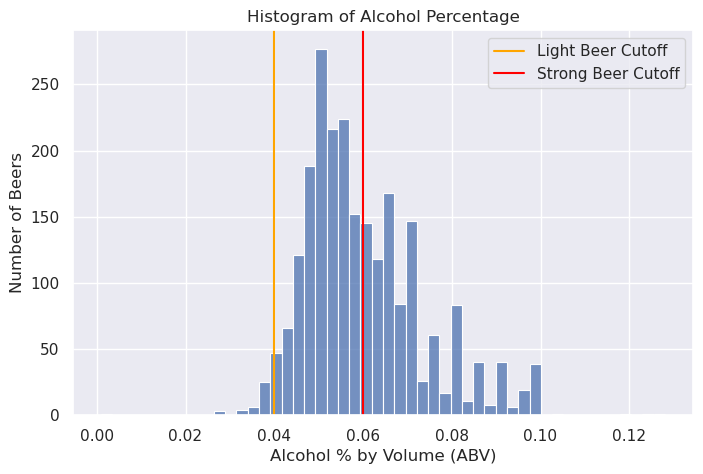

In [9]:
fig = plt.figure(figsize=(8,5))
ax = plt.gca()
sns.histplot(data=df_bb, x="abv", ax = ax)
plt.title("Histogram of Alcohol Percentage")
ax.axvline(x=0.04, color="orange", label="Light Beer Cutoff")
ax.axvline(x=0.06, color="red", label="Strong Beer Cutoff")
plt.xlabel(r'Alcohol % by Volume (ABV)')
plt.ylabel('Number of Beers')
ax.legend()
plt.show()


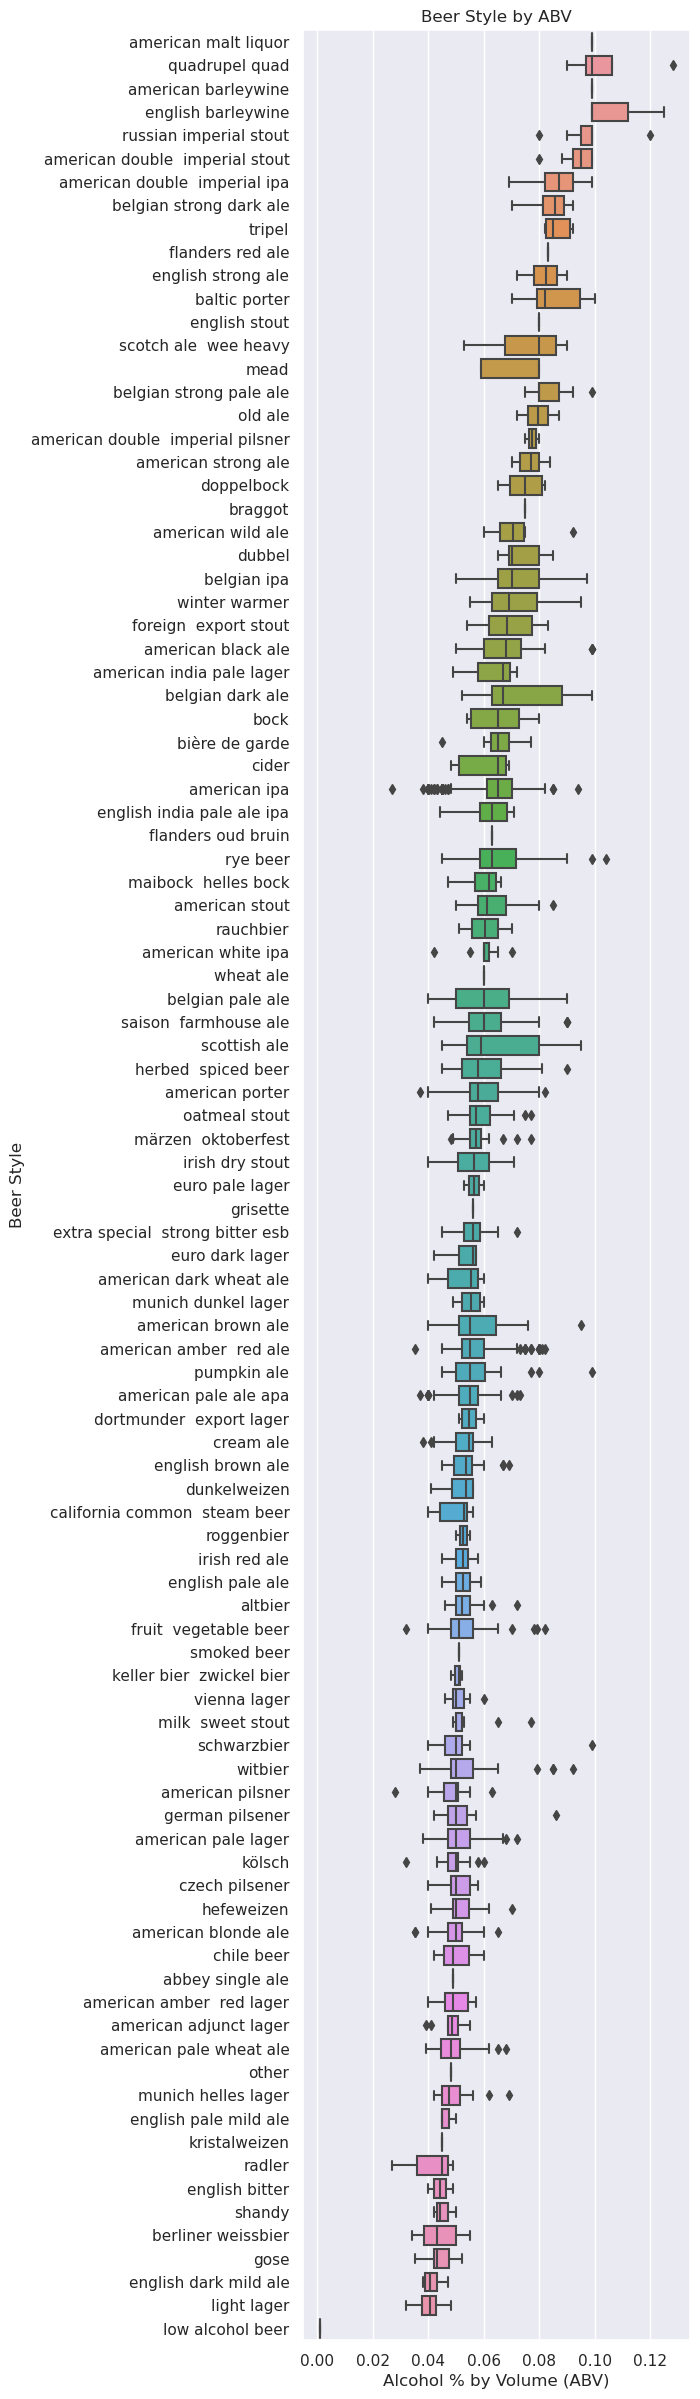

In [43]:
df_grouped = df_bb.loc[:,['style', 'abv']] \
    .groupby(['style']) \
    .median() \
    .sort_values(by='abv', ascending=False)

fig = plt.figure(figsize=(5,30))
sns.boxplot(x="abv", y="style", data=df_bb, order=df_grouped.index)
plt.xlabel(r'Alcohol % by Volume (ABV)')
plt.ylabel('Beer Style')
plt.title("Beer Style by ABV")
plt.show()

In [24]:
from src.helper.visual import plot_bar_chart, plot_word_cloud

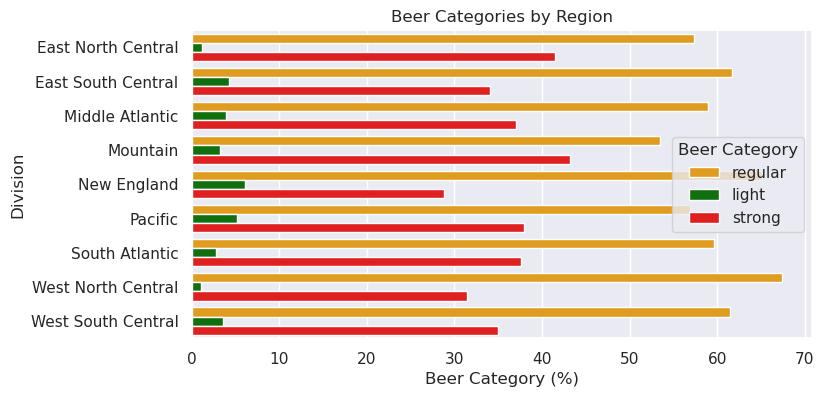

In [18]:
plot_bar_chart(
    df_bb,
    "beer_category",
    "division",
    "Division",
    "Beer Category (%)",
    "Beer Category"
)

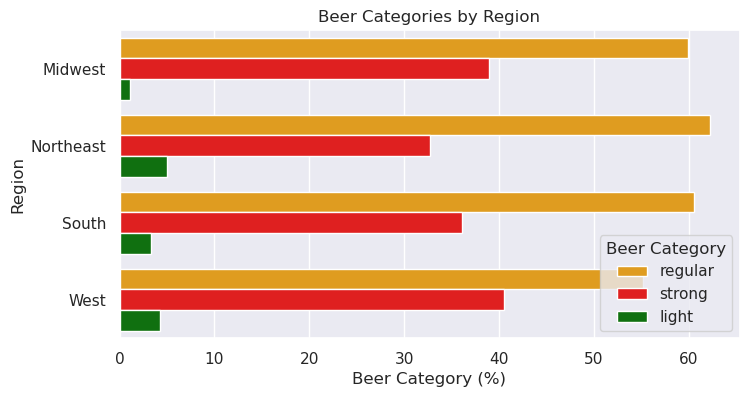

In [19]:
plot_bar_chart(
    df_bb,
    "beer_category",
    "region",
    "Region",
    "Beer Category (%)",
    "Beer Category"
)

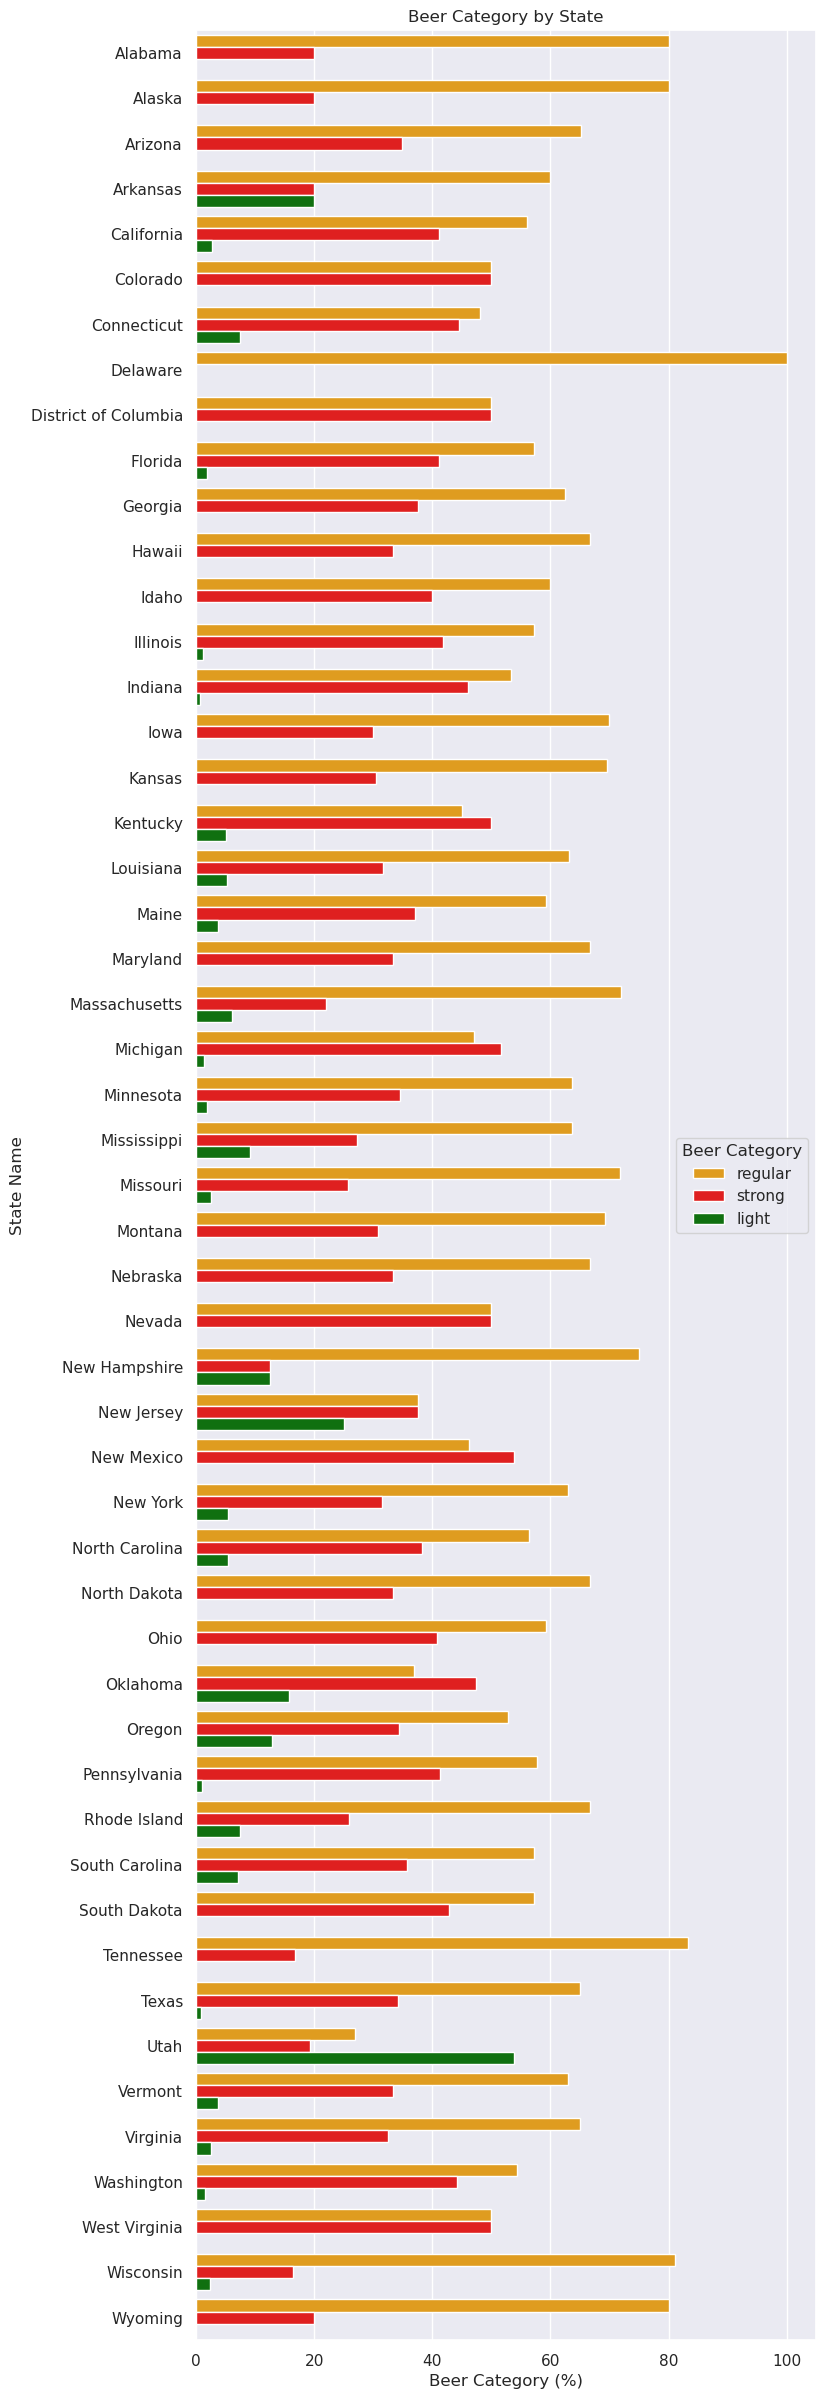

In [21]:
plot_bar_chart(
    df_bb,
    "beer_category",
    "state_name",
    "State Name",
    "Beer Category (%)",
    "Beer Category",
    title="Beer Category by State",
    figsize=(8,30)
)

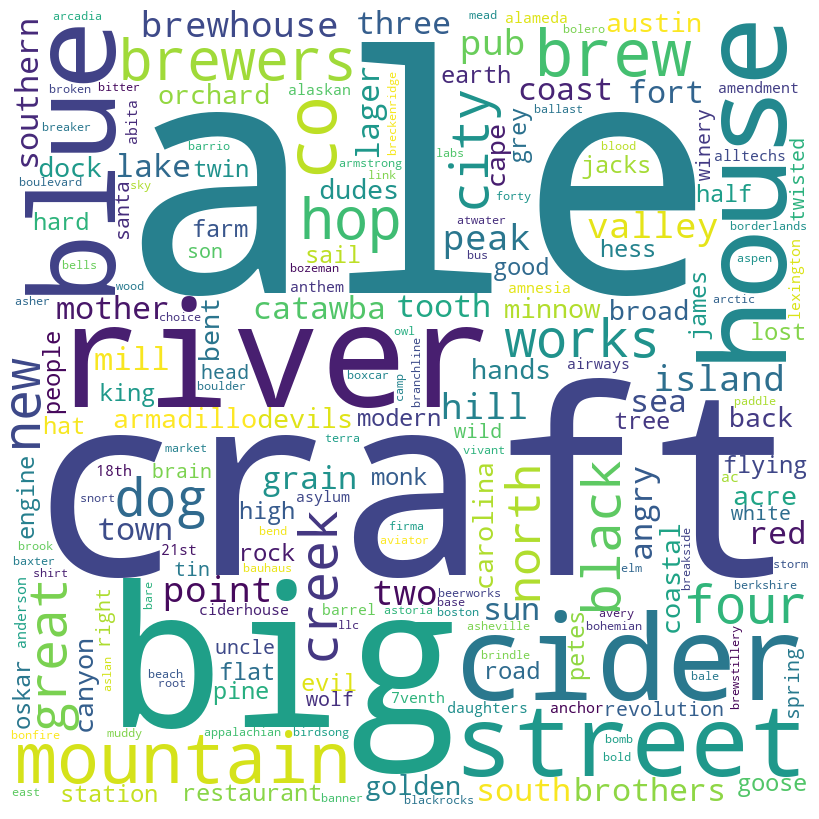

In [25]:
plot_word_cloud(df_bb, "brewery_name", words_to_exclude = {"brewing","brewery","company","beer"})

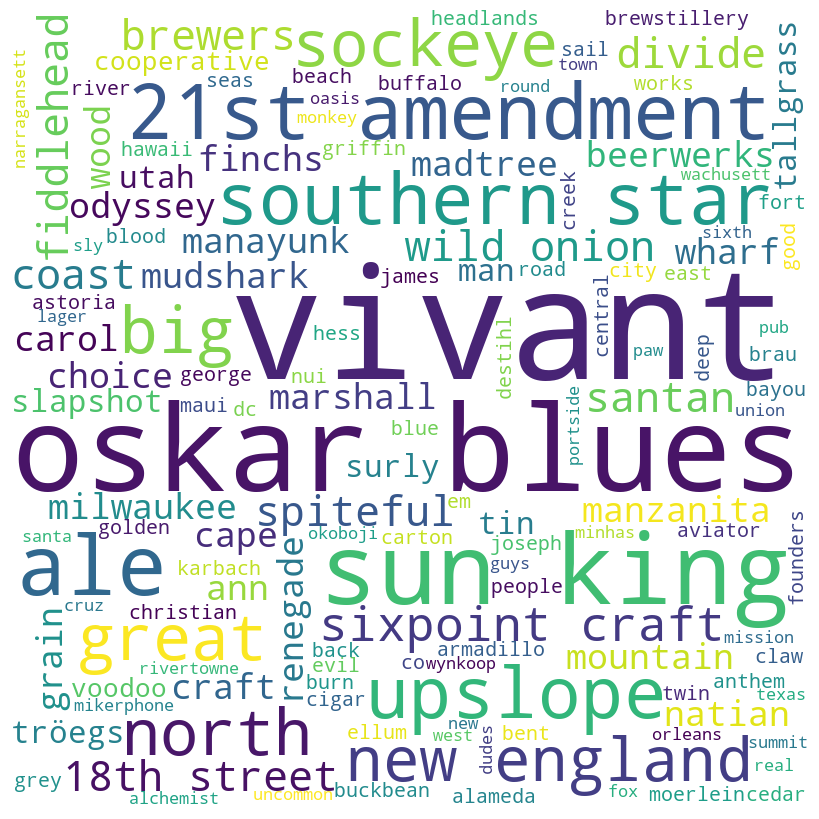

In [115]:
plot_word_cloud(df_bb[df_bb["beer_category"] == "heavy"], "brewery_name", words_to_exclude = {"brewing","brewery","company","beer"})

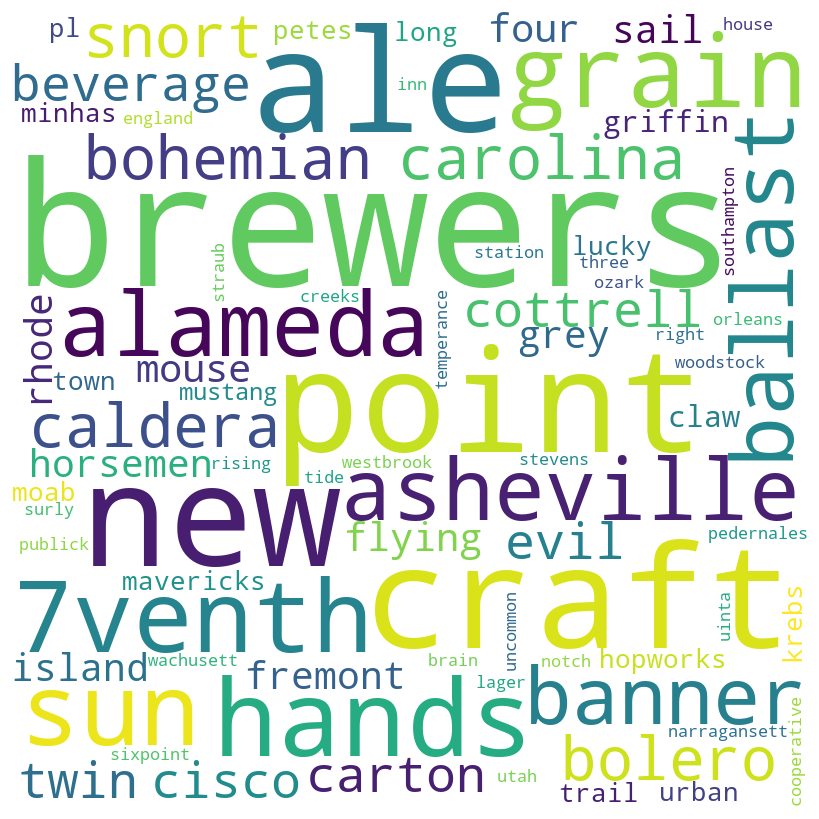

In [26]:
plot_word_cloud(df_bb[df_bb["beer_category"] == "light"], "brewery_name", words_to_exclude = {"brewing","brewery","company","beer"})

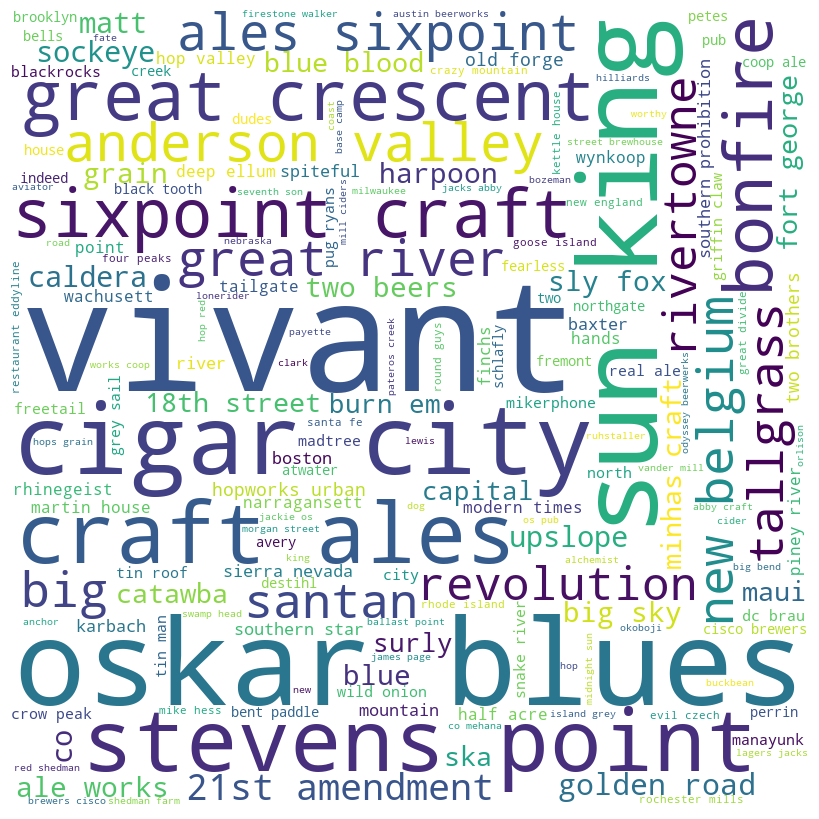

In [117]:
plot_word_cloud(df_bb[df_bb["beer_category"] == "regular"], "brewery_name", words_to_exclude = {"brewing","brewery","company","beer"})

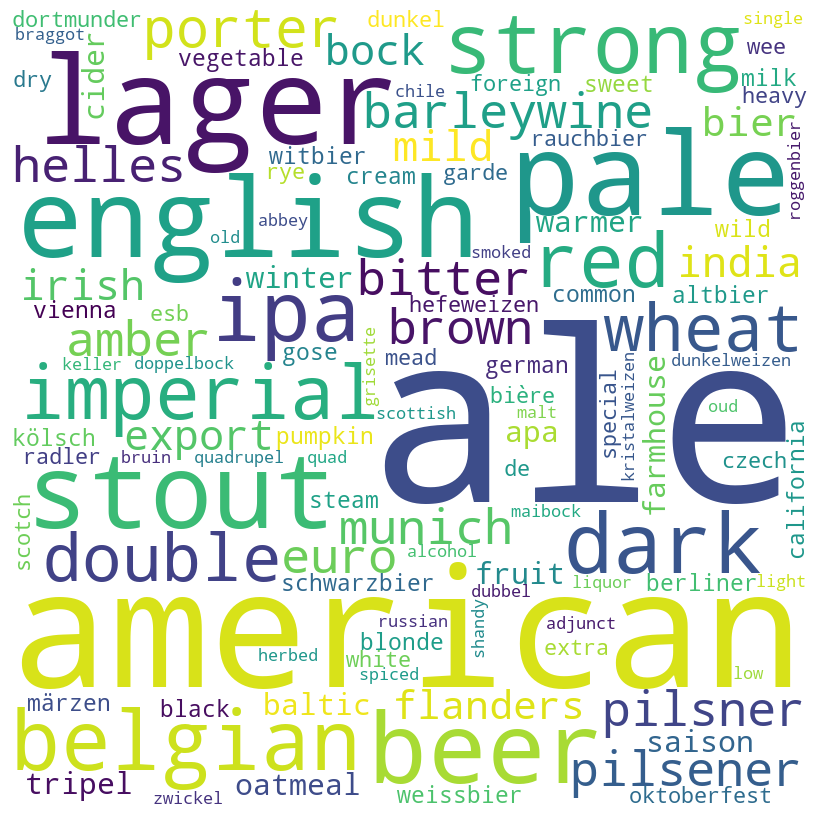

In [28]:
plot_word_cloud(df_bb, "style")

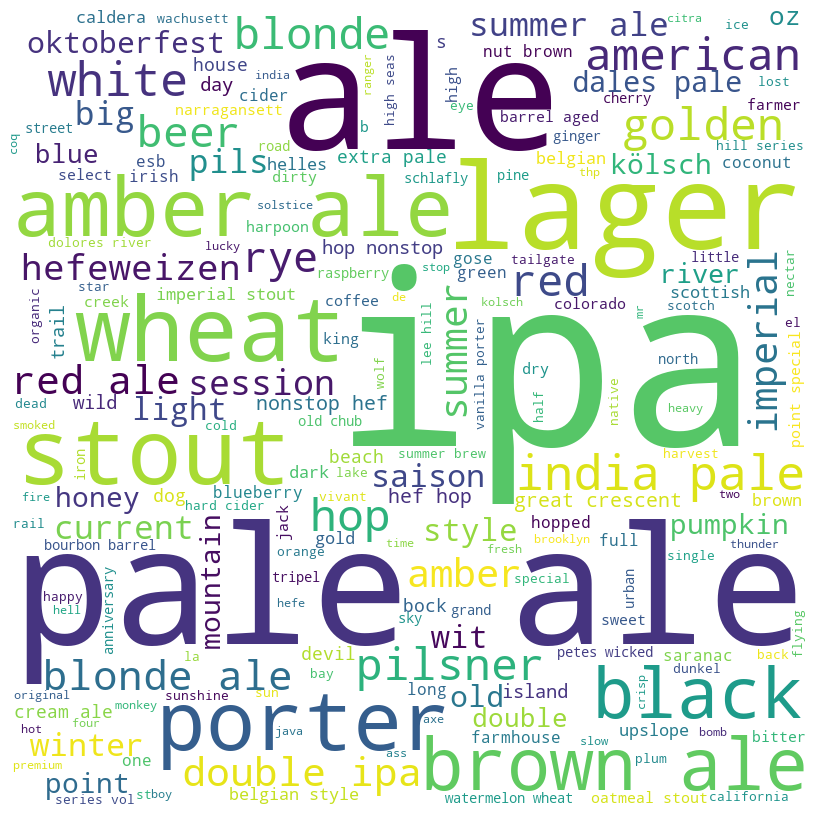

In [109]:
plot_word_cloud(df_bb, "name")